***

* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [3. Positional Astronomy](3_0_Introduction.ipynb)
    * Previous: [3.1 Equatorial Coordinates (RA,DEC)](3_1_equatorial_coordinates.ipynb)
    * Next: [3.3 Horizontal Coordinates (ALT,AZ)](3_3_horizontal_coordinates.ipynb) 

***

Import standard modules:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

Import section specific modules:

In [3]:
from IPython.display import HTML
import ephem
import matplotlib
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 10)
import matplotlib
HTML('../style/code_toggle.html')

Populating the interactive namespace from numpy and matplotlib


## 3.2 Hour Angle (HA) and Local Sidereal Time (LST) 

As we already mentioned in the chapter introduction, the static equatorial coordinates right ascension and declination are not enough if one wants to pin point the location of an object in the night sky from earth. We introduce two concepts here (namely hour angle and local sidereal time) which together with the static equatorial coordinates allow an observer to track celestial objects from earth.  

### 3.2.1 Hour Angle (HA)<a id='pos:sec:ha'></a> <!--\label{pos:sec:ha}-->

*Zenith* is the position on the celestial sphere which lies directly above an observer on earth. *Nadir* is the position on the celestial sphere which lies directly below an observer on earth. The *local meridian* is the hour circle on the celestial sphere which we form when we connect the NCP with zenith. Celestial objects rise in the east reach their highest point when they cross the local meridian (we say they are at *transit*) and set in the west. 
<div class=advice>
<b>Note:</b> The *hour angle* (denoted with $H$) of a celestial body is the angular distance (measured in hours) between the hour circle of a celestial object and the local meridian measured along the celestial equator in a westerly direction.
</div><br>
In other words, the hour angle is the time that still needs to pass before a celestial body is at transit if it is negative or the time since it was at transit if it is positive. We can therefore use it instead of right ascension as a celestial longitude to keep track of the stars as they move across the sky of an earth bound observer.

### 3.2.2 Local Sidereal Time (LST) <a id='pos:sec:lst'></a> <!--\label{pos:sec:lst}-->

Our wrist watches keep track of when the sun will be at transit. The solar time-keeping system we use ensures that our working day aligns with the rising and setting of the sun. Astronomers are however more intereseted in keeping track of the stars, since they want to observe them. They therefore use a sidereal time-keeping system to keep track of the vernal equinox (instead of the sun). <span style="background-color:cyan">KT:XX: The switching between the Vernal Equinox and the First point of Aries might be a bit confusing - I would suggest that a single term is used here.</span> 

<div class=advice>
<b>Note:</b> The hour angle of the first point of Aries is your <em>local sideral time</em>.
</div><br>
Once you know the time before or since the vernal equinox was at transit you can easily determine when any other star will be at transit. This is true, since there exists a simple relation between the hour angle of a celestial body and your local sidereal time which is given by: 

<p class=conclusion>
  <font size=4> <b>Relation between HA, $\alpha$ and LST</b></font>
  <br>
  <br>
\begin{equation}
H = \textrm{LST} - \alpha.
\end{equation}
</p><br>
The above relation is presented graphically in [Fig. 3.2.1  &#10549;](#pos:fig:hour_angle) <!--\ref{pos:fig:hour_angle}-->.

<a id='pos:fig:hour_angle'></a> <!--\label{pos:fig:hour_angle}--> <img src='figures/hour.svg' width=40%> 

**Figure 3.2.1**: The relationship that exists between $\alpha$, $H$ and LST. The red plane represents the fundamental plane of the celestial coordinate system. The
the blue plane represent the fundamental plane of the horizontal coordinate system (see [$\S$ 3.3 &#10142;](3_3_horizontal_coordinates.ipynb)). 

The natural question now arises, why do we need separate time-keeping systems to keep track of the stars and the sun? The answer is that a *sidereal day* is 4 minutes shorter than a *solar day*. A solar day is the time it takes for the sun to return to the same position in the sky, while a sidereal day is the amount of time it takes for an arbitrary star to return to the same location in the sky. We can explain the reason for this time difference with the aid of Fig. [Fig. 3.2.2  &#10549;](#pos:fig:sidereal) <!--\ref{pos:fig:sidereal}-->. When the sun reappears at the same location in the sky (after 24 hours) it appears to have moved on the celestial sphere (it has moved relative to the background stars). The apparent movement of the sun on the celestial sphere is due to the fact that the earth needs to complete a little bit more than one full rotation for the sun to reappear at the same position in the sky. It needs a little bit more than one full rotation due to the fact that the earth orbits the sun. Since the background stars are much further away the earth only needs one full rotation (23 hours and 56 minutes) for an arbitrary star to reappear at the same position in the sky.

<a id='pos:fig:sidereal'></a> <!--\label{pos:fig:sidereal}--><img src='figures/sidereal.svg' width=50%> 

**Figure 3.2.2**: Since the earth and sun rotate around each other on a yearly cycle the sidereal day is shorter than a solar day.

We are now in a position to attain a better understanding of what the vernal equinox physically represents. As discussed in the previous paragraph the sun appears to move on the celestial sphere (its right ascension and declination changes throughout the year). As mentioned in [$\S$ 3.1 &#10142;](3_1_equatorial_coordinates.ipynb), the imaginary path it traverses on the celestial sphere is known as the ecliptic. The ecliptic is depicted in [Fig. 3.2.3  &#10549;](#pos:fig:radec) <!--\ref{pos:fig:radec}-->. The vernal equinox is the point on the celestial sphere where the Sun crosses the celestial equator from south to north. The vernal equinox is currently in Pisces, but used to be in Aries. Which is why it is also known as the first point of Aries. It has moved due to precession. 

<a id='pos:fig:radec'></a> <!--\label{pos:fig:radec}--><img src='figures/RADEC.svg' width=100%>

**Figure 3.2.3**: The ecliptic is marked in yellow. The celestial equator is marked in blue. The stars that have the same color and are located near each other belong to the same constellation. The vernal equinox is the point where the ecliptic crosses the celestial equator from south to north. The twelve zodiac constellations are labelled in green. The ecliptic traverses through all twelve of these constellations (i.e. the sun passes through these twelve constellations during its yearly journey).

### 3.2.3 Example <a id='pos:sec:lst_ex'></a> <!--\label{pos:sec:lst_ex}-->

In the previous section I mentioned that the sidereal day is 4 min shorter than the solar day. The gap between the local sidereal time and the solar time will steadily increase 
as the year passes, until the time between them amounts to a full day. When this 
happens the two clocks are aligned for a brief moment. The sidereal clock will then start to speed up again relative to the solar clock until another year has passed. We investigate this phenomenon below. We again make use of the `pyephem` package. We only use the `Observer` class in the code snippet below. An observer object has a date attribute to which a date time string in [<cite data-cite=''>UTC (Coordinated Universal Time)</cite> &#10548;](https://en.wikipedia.org/wiki/Coordinated_Universal_Time) can be assigned. One also needs to set the geographical coordinates of the observer object. In the example below we chose the geographical coordinates to be equal to the Jodrell Bank Observatory. The observer object then has a method called `sidereal_time` which can calculate the current sidereal time of the observer given the current time of the observer in UTC. We plot the local sidereal time of the observer at 23:59:59 UTC on the 22nd of each month for an entire year (2016) in [Fig. 3.2.4  &#10549;](#pos:fig:lst_utc) <!--\ref{pos:fig:lst_utc}-->.

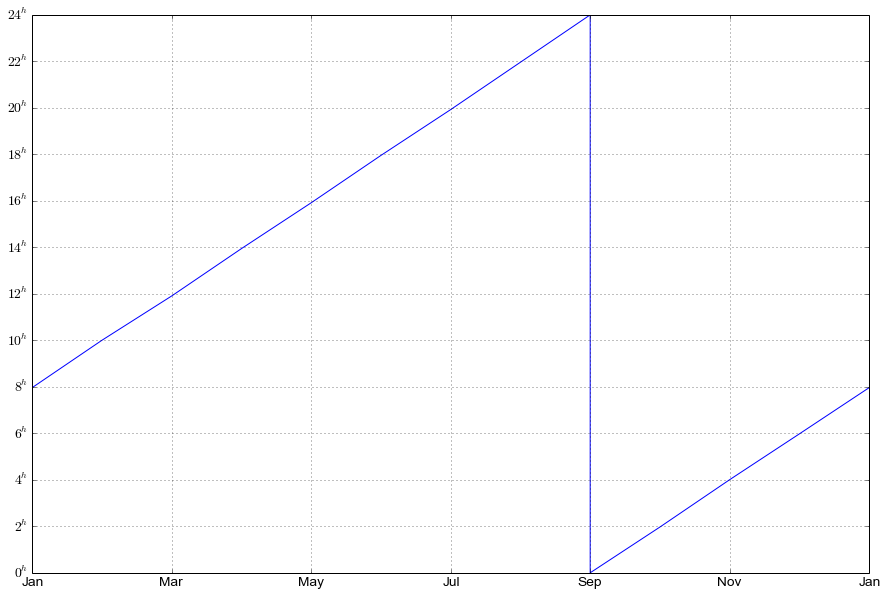

In [4]:
#Setting up the observer
JB = ephem.Observer() 
JB.lat = '53:14:10'
JB.lon = '-02:18:26'
JB.elevation = 0.0

months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
h_number = np.zeros((14,),dtype=float)

#Calculating the lst at differnt times of the year
for k in xrange(1,14):
    if k < 10:
       JB.date = '2016/'+str(k)+'/22  23:59:59'
       str_sid = str(JB.sidereal_time()).split(":")
       h_number[k-1] = float(str_sid[0]) + float(str_sid[1])/60. + float(str_sid[2])/3600.
    elif k > 10:
       JB.date = '2016/'+str(k-1)+'/22  23:59:59'
       str_sid = str(JB.sidereal_time()).split(":")
       h_number[k-1] = float(str_sid[0]) + float(str_sid[1])/60. + float(str_sid[2])/3600 

#Plot
matplotlib.rcParams.update({'font.size': 13.75})

fig, ax = plt.subplots()
h_number[-1] = h_number[0]
x = np.arange(14)
x[9:] = x[9:]-1 

ax.plot(x,h_number)

ax.set_ylim([0,24])

ticks = np.array([0,2,4,6,8,10,12,14,16,18,20,22,24])
plt.yticks(ticks)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels = np.array(["Jan","Mar","May","Jul","Sep","Nov","Jan"])
ax.set_xticklabels(labels)

labels = [item.get_text() for item in ax.get_yticklabels()]
labels = np.array(['$0^h$','$2^h$','$4^h$','$6^h$','$8^h$','$10^h$','$12^h$','$14^h$','$16^h$','$18^h$','$20^h$','$22^h$','$24^h$'])
ax.set_yticklabels(labels)

plt.grid('on')

**Figure 3.2.4**: The local sidereal time of the Jodrell Bank Observatory at 23:59:59 UTC on the 22nd of each month for 2016. Clearly the difference between the local sidereal time and the UTC time at the observatory steadily increases until somewhere in September when everything resets. The point at which everything resets is actually associated with a physical event. It is when the sun and the verneal equinox allign. <a id='pos:fig:lst_utc'></a> <!--\label{pos:fig:lst_utc}-->

***

Next: [3.3 Horizontal Coordinates (ALT,AZ)](3_3_horizontal_coordinates.ipynb)